In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as stats
import numpy as np
import seaborn as sns

carprice_df = pd.read_csv('CarPrice_Assignment.csv')

In [156]:
carprice_df.shape

(205, 26)

In [157]:
carprice_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [158]:
carprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [159]:
# The unique values in our categorical columns

carprice_df.select_dtypes(include='object').nunique()

CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
dtype: int64

In [160]:
# Drop car_ID and CarName. They're only identifiers and contain too many unique values.

carprice_df = carprice_df.drop(columns=['car_ID','CarName'])
carprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

## Basic Multilinear Regression model

Now that we have the columns we need, we'll start by using just 4 variables.


In [161]:
#Using statsmodel, we'll add a constant column to our dataframe of multiple independent variables 

X_basic = stats.add_constant(carprice_df[['curbweight','enginesize','peakrpm','citympg']])
Y_basic = carprice_df.price

In [162]:
model_basic = stats.OLS(Y_basic, X_basic) #target variable has to be entered before independent variables
results_basic = model_basic.fit()
print(results_basic.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     225.0
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           7.62e-73
Time:                        11:44:10   Log-Likelihood:                -1957.7
No. Observations:                 205   AIC:                             3925.
Df Residuals:                     200   BIC:                             3942.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.022e+04   5937.020     -5.090      0.0

# Full Regression Model

To build the full regression model, the number of columns needs to be reduced.
Columns that are too highlighly correlated will be removed. We don't want errors brought about by multicollinearity.
Multicolinearity occurs when our feature variables are strongly correlated to each other and our algorithm is unable to separate the effects of the two variables thus causing errors.

In [163]:
carprice_df.select_dtypes(exclude = 'object').corr().style.background_gradient(cmap='coolwarm')

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


In [164]:
# drop highly correlated columns

carprice_df = carprice_df.drop(columns = ['carlength','carwidth','highwaympg'])
carprice_df.select_dtypes(exclude = 'object').corr().style.background_gradient(cmap='coolwarm')

,symboling,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
symboling,1.000000,-0.531954,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,-0.079978
wheelbase,-0.531954,1.000000,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,0.577816
carheight,-0.541038,0.589435,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,0.119336
curbweight,-0.227691,0.776386,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,0.835305
enginesize,-0.105790,0.569329,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,0.874145
boreratio,-0.130051,0.488750,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,0.553173
stroke,-0.008735,0.160959,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,0.079443
compressionratio,-0.178515,0.249786,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.067984
horsepower,0.070873,0.353294,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,0.808139
peakrpm,0.273606,-0.360469,-0.320411,-0.266243,-0.244660,-0.254976,-0.067964,-0.435741,0.131073,1.000000,-0.113544,-0.085267


# One hot encoding

In [165]:
dummy = pd.get_dummies(carprice_df.select_dtypes(include='object'), drop_first=True)  #drop the first value to prevent multicollinearity

In [166]:
carprice_df = pd.concat([carprice_df.select_dtypes(exclude='object'),dummy],axis = 1)

In [167]:
carprice_df.corr().style.background_gradient(cmap='coolwarm')

,symboling,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
symboling,1.000000,-0.531954,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,-0.079978,0.194311,-0.059866,0.664073,0.168845,0.435648,-0.378341,-0.298243,0.102839,-0.076381,0.212471,0.009347,-0.133979,-0.082855,0.037513,-0.013597,0.245950,-0.090188,-0.034161,-0.000238,0.065707,-0.047012,0.245950,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
wheelbase,-0.531954,1.000000,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,0.577816,-0.308346,0.257611,-0.447357,-0.008608,-0.386094,0.291086,0.210899,-0.460355,0.498830,-0.187790,-0.004156,0.399603,-0.204037,-0.183195,0.166152,-0.081174,0.261182,-0.309492,0.145842,-0.120709,0.037803,-0.081174,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
carheight,-0.541038,0.589435,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,0.119336,-0.284631,0.087311,-0.552208,-0.072328,-0.477476,0.235863,0.459148,-0.100273,0.039814,-0.106234,-0.092628,0.319687,0.036260,-0.046670,-0.065063,-0.238720,0.152982,0.059696,-0.049777,-0.015076,-0.170181,-0.238720,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-0.066778
curbweight,-0.227691,0.776386,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,0.835305,-0.217275,0.324902,-0.197379,0.098956,-0.287501,0.099425,0.164075,-0.666039,0.669987,0.050468,0.109243,0.250124,-0.413293,-0.080295,0.400878,-0.039196,0.264554,-0.576463,0.405490,-0.143903,0.187964,-0.039196,-0.577159,-0.040801,0.217275,0.034431,0.520220,-0.002434,0.024052
enginesize,-0.105790,0.569329,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,0.874145,-0.069594,0.108217,-0.020742,0.239363,-0.216805,0.088459,-0.027518,-0.518391,0.565509,0.196826,0.128248,0.016063,-0.363334,-0.016508,0.562403,-0.184762,0.144878,-0.631431,0.511783,-0.111081,0.335555,-0.184762,-0.442562,-0.166946,0.069594,0.049033,0.483520,0.004490,-0.013327
boreratio,-0.130051,0.488750,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,0.553173,-0.054451,0.212614,-0.119258,0.208089,-0.227032,0.030517,0.105719,-0.583087,0.574105,0.185042,0.158136,0.181729,-0.410383,0.326798,0.119509,0.000127,-0.007797,-0.164076,0.128365,-0.108774,0.054482,0.000127,-0.353342,0.000110,0.054451,0.070030,0.419335,-0.004213,0.025977
stroke,-0.008735,0.160959,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,0.079443,-0.241829,0.222982,0.011082,0.043215,0.052316,0.035630,-0.095084,0.124397,-0.022325,-0.138455,-0.032545,-0.084688,0.366084,-0.522808,-0.044813,-0.000187,0.176485,-0.111046,0.068388,-0.050450,-0.110878,-0.000187,-0.234866,-0.000162,0.241829,0.144263,-0.110280,0.251259,-0.005688
compressionratio,-0.178515,0.249786,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.067984,-0.984356,0.295541,-0.177888,0.029623,-0.202650,0.188286,0.016315,-0.062683,0.105185,-0.019762,-0.002519,0.219153,0.027545,-0.084328,-0.086649,-0.026436,0.173360,-0.012522,-0.065559,-0.011354,0.023986,-0.026436,-0.183384,-0.022838,0.984356,-0.055528,-0.311035,-0.153726,-0.016654
horsepower,0.070873,0.353294,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,0.808139,0.163926,0.241685,0.126947,0.194801,-0.053770,-0.024097,-0.063081,-0.544438,0.57

In [168]:
# drop highly correlated columns after adding back concatenated one hot encoded columns

carprice_df = carprice_df.drop(columns=['compressionratio','drivewheel_fwd','enginetype_rotor','fuelsystem_4bbl','fuelsystem_idi'])

In [169]:
carprice_df.shape

(205, 36)

## Split our data into training set and test set

In [170]:
train_df = carprice_df.sample(frac=0.7,random_state=99) #random state is a seed value
test_df= carprice_df.drop(train_df.index)

In [171]:
train_df.shape

(144, 36)

In [172]:
test_df.shape

(61, 36)

## Fitting the Linear Regression Model

In [173]:
Y_train = train_df.price
X_train = stats.add_constant(train_df.drop(columns=['price']))

In [174]:
model_carprice = stats.OLS(Y_train,X_train)
results_carprice = model_carprice.fit()
print(results_carprice.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     48.60
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.43e-51
Time:                        11:44:12   Log-Likelihood:                -1299.3
No. Observations:                 144   AIC:                             2669.
Df Residuals:                     109   BIC:                             2773.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -1.11e+

In [175]:
print('The sum of square residuals is {:.1f}'.format(results_carprice.ssr))

The sum of square residuals is 579728377.8


In our simple regression notebook, the sum of square residual errors was 2.3 billion. Now it is half a billion.
As we train our model on the same data points with more independent variables, the total error is reducing.


In [176]:
#Now, to compare our predictions from test set with observed values.

Y_test = test_df.price
X_test = stats.add_constant(test_df.drop(columns='price'))
test_predictions = results_carprice.predict(X_test)

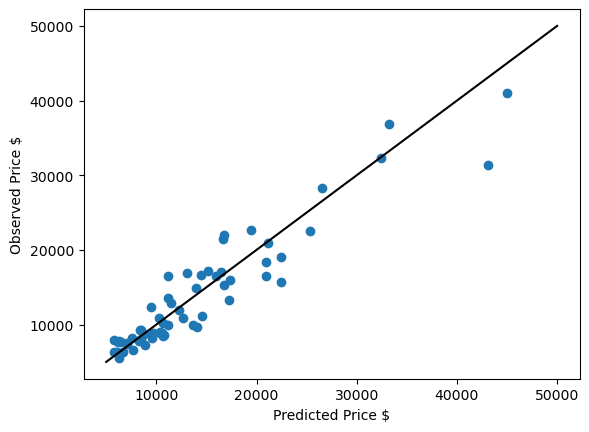

In [177]:
plt.scatter(test_predictions, Y_test)
plt.plot([5000,50000],[5000,50000],c='k',ls='solid')
plt.xlabel('Predicted Price $')
plt.ylabel('Observed Price $')
plt.show()

## Observation
Points in the above diagram are much tighter to the diagonal line as compared to those in the simple regression line.

# Using Scikit-Learn

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [179]:
Y = carprice_df.price
X = carprice_df.drop(columns='price') #When we have multiple independent variables, there is no need to reshape our X array because it is already a 2D array

sk_X_train, sk_X_test, sk_Y_train, sk_Y_test = train_test_split(X, Y, test_size=0.3, random_state=99)

In [180]:
regressor = LinearRegression()
regressor.fit(sk_X_train,sk_Y_train)

LinearRegression()

In [181]:
sk_intercept_carprice = regressor.intercept_
sk_engsize_coeff = regressor.coef_
sk_ssr_carprice = np.sum((sk_Y_train-regressor.predict(sk_X_train))**2)

In [182]:
pd.Series(sk_engsize_coeff, index=sk_X_train.columns)

symboling                  252.334986
wheelbase                   74.129758
carheight                   83.090197
curbweight                   4.839412
enginesize                 171.517234
boreratio                -5949.062573
stroke                   -6214.262410
horsepower                  22.177987
peakrpm                      2.154338
citympg                     42.120918
fueltype_gas             -1110.769127
aspiration_turbo          2083.399192
doornumber_two             -66.714720
carbody_hardtop          -2879.089218
carbody_hatchback        -2613.058557
carbody_sedan            -1980.959589
carbody_wagon            -3223.606531
drivewheel_rwd             210.926216
enginelocation_rear       8110.261998
enginetype_dohcv          1368.411791
enginetype_l               471.764375
enginetype_ohc            4039.235519
enginetype_ohcf           2413.522575
enginetype_ohcv          -2760.029705
cylindernumber_five      -1192.808616
cylindernumber_four      -1295.217999
cylindernumb

In [183]:
print('Using Scikit-learn...')
print('The intercept value is {:.3f}'.format(sk_intercept_carprice))
print('The sum of square residuals is {:.1f}'.format(sk_ssr_carprice))

Using Scikit-learn...
The intercept value is -5972.412
The sum of square residuals is 496875718.4


## P-values and coefficients
Statsmodel provides us with p values associated with each of our regression coefficients.
Scikit learn doesn't offer any fuctionality to calculate p values so stats model should be used to test the significance of coefficients.


In [193]:
print(results_carprice.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     48.60
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.43e-51
Time:                        11:56:22   Log-Likelihood:                -1299.3
No. Observations:                 144   AIC:                             2669.
Df Residuals:                     109   BIC:                             2773.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -1.11e+

Many of the independent levels are not statistically significant at the 5% level.
They have a p-value greater than 5%.
These columns will be discarded and our model retrained with those that are only statistically significant.

In [201]:
pd.DataFrame(results_carprice.pvalues)

,0
const,0.484961
symboling,0.852440
wheelbase,0.262023
carheight,0.637336
curbweight,0.134039
enginesize,0.005481
boreratio,0.086634
stroke,0.046561
horsepower,0.037996
peakrpm,0.110352


In [206]:
Y_train_new = train_df.price
X_train_new = stats.add_constant(train_df[['enginesize','stroke',
                                    'horsepower', 
                                    'enginetype_ohc', 
                                    'enginetype_ohcv', 
                                    'cylindernumber_five', 
                                    'cylindernumber_four', 
                                    'cylindernumber_six',
                                    'cylindernumber_twelve',
                                    'fuelsystem_spdi']])

In [207]:
model_carprice_new = stats.OLS(Y_train_new, X_train_new)
results_carprice_new = model_carprice_new.fit()
print(results_carprice_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     113.3
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           5.02e-60
Time:                        12:04:28   Log-Likelihood:                -1337.4
No. Observations:                 144   AIC:                             2697.
Df Residuals:                     133   BIC:                             2729.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6518.34

### Coefficients

The coefficients indicate how much the target variable changes for a one unit change in the corresponding independent variable when all the other independent variables are held fixed. To get a measure of which independent variable contributes the most change to the target variable, first scale all the independent variables to remove the units. This is known as standardization.

In [208]:
X_train_scale = ((X_train_new - X_train_new.mean())/X_train_new.std()).drop(columns=['const'])

In [209]:
X_train_scale.std()

enginesize               1.0
stroke                   1.0
horsepower               1.0
enginetype_ohc           1.0
enginetype_ohcv          1.0
cylindernumber_five      1.0
cylindernumber_four      1.0
cylindernumber_six       1.0
cylindernumber_twelve    1.0
fuelsystem_spdi          1.0
dtype: float64

In [210]:
X_train_scale.mean().round(2)

enginesize               0.0
stroke                   0.0
horsepower               0.0
enginetype_ohc           0.0
enginetype_ohcv         -0.0
cylindernumber_five      0.0
cylindernumber_four     -0.0
cylindernumber_six       0.0
cylindernumber_twelve   -0.0
fuelsystem_spdi          0.0
dtype: float64

In [211]:
X_train_scale = stats.add_constant(X_train_scale)
model_carprice_scale = stats.OLS(Y_train_new, X_train_scale)
results_carprice_scale = model_carprice_scale.fit()
print(results_carprice_scale.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     113.3
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           5.02e-60
Time:                        12:04:51   Log-Likelihood:                -1337.4
No. Observations:                 144   AIC:                             2697.
Df Residuals:                     133   BIC:                             2729.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   1.31e+

<AxesSubplot:>

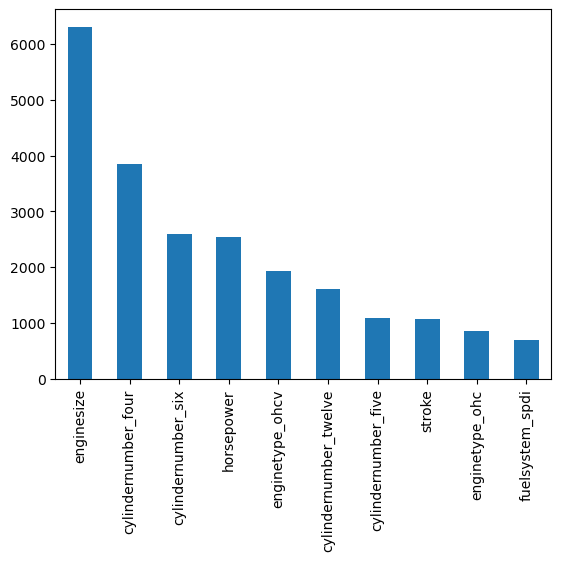

In [212]:
results_carprice_scale.params.drop(index=['const']).abs().sort_values(ascending=False).plot.bar()

A change in engine size contributes the biggest change to price.
The graph above gives us a sense of how important each feature is.

## Residuals and Residual Plots

In [213]:
results_carprice_new.resid

71      744.188184
24      179.664673
51     -380.742937
162    1186.055387
97     1038.898963
          ...     
105     -79.718093
29    -5674.105616
109    1743.976385
122     356.022613
181   -5499.861572
Length: 144, dtype: float64

plot these residuals against  predicted values for the training data and observe if there are any non-random pattern in the data

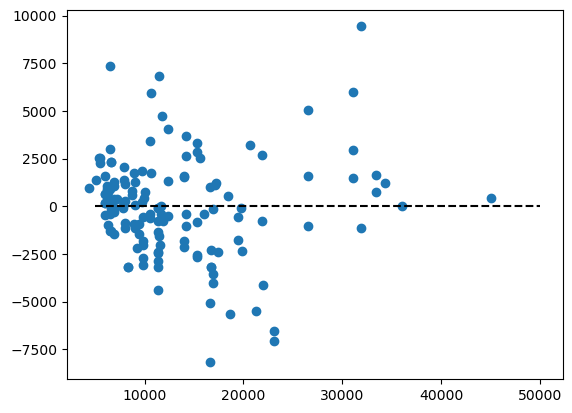

In [214]:
plot.scatter(results_carprice_new.fittedvalues, results_carprice_new.resid)
plot.plot([5000,50000], [0,0], c='k', ls='--')

There is no discernible pattern. This is promising.
The results provide us with a Durbin Watson metric that tests the residuals for any possible autocorrelation.
It will have a value of between 0 and 4.
A value of 2 means no auto correlation.
Values between 1.5 and 2.5 are relatively normal when the data is not especially correlated.
Our model gives us a value of 1.845, which is not a cause for concern.

#### Breusch-Pagan test
We can also do a quick test for heteroskedasticity using the [Breusch-Pagan](https://www.statology.org/breusch-pagan-test/) test. Here we calculate the value $nR^{2}$ where $n$ is the number of datapoints in the model (in our case 144) and $R^{2}$ is the coefficient of determination. This is given to us in the results summary where it is shown as R-squared (our value is 0.883). This value is distributed as a $\chi^{2}$ variable with degrees of freedom of $n-p-1$ where $p$ is our number of independent variables in the model (the -1 is for the intercept value). From this we can get a p-value where our null hypothesis is that the data is homoscedastic (constant variance) i.e. the probabiltity that our data is homoscedastic. If our p-value is less that 0.05 then it is significant and our data is likely heteroskedastic.
From our data we get a value for $nR^{2}$ of 127 and we have $144-11-1=132$ degrees of freedom. We can use these two values to [calculate](https://www.statology.org/chi-square-p-value-calculator/) our p-value. For our data we get a p-value of 0.6 and as such this is not significant and we can treat the data as homoscedastic.

### Evaluation of Linear Regression

Now that we are satisfied that a linear regression model is appropriate, and our data doesn't violate any assumptions required to use OLS, we can move on to evaluate our model using other metrics.

In [215]:
train_mse = stats.tools.eval_measures.mse(Y_train_new, results_carprice_new.fittedvalues)
print('The training dataset mean square error is {}'.format(train_mse.round(1)))

train_rmse = stats.tools.eval_measures.rmse(Y_train_new, results_carprice_new.fittedvalues)
print('The training dataset root mean square error is {}'.format(train_rmse.round(1)))

train_mae = stats.tools.eval_measures.meanabs(Y_train_new, results_carprice_new.fittedvalues)
print('The training dataset mean absolute error is {}'.format(train_mae.round(1)))

train_r2 = results_carprice_new.rsquared
print('The training dataset coefficient of determination is {}'.format(train_r2.round(3)))

train_r2_adj = results_carprice_new.rsquared_adj
print('The training dataset adjusted coefficient of determination is {}'.format(train_r2_adj.round(3)))

The training dataset mean square error is 6832717.9
The training dataset root mean square error is 2613.9
The training dataset mean absolute error is 1889.0
The training dataset coefficient of determination is 0.895
The training dataset adjusted coefficient of determination is 0.887


We can see above in the root mean square error that our predictions are typically around \\$3000 off from the observed values and that the data explains 89.5% of the variation from the coefficient of determination. 

The coefficient of determination and root mean square error for our simple linear regression model from Chapter 2 were 75.2% and \\$4000 respectively so we are explaining more of the variation and getting better (on average) predictions with our multiple independent variables. 
As the adjusted coefficient of determination is similar here we can be reasonably confident that the addition of more independent variables is not simply adding random fluctuations to the model.